In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from collections import Counter
import matplotlib.pyplot as plt

In [27]:
import pandas as pd
df = pd.read_csv("/content/naukri_data_science_jobs_india.csv.zip")
df.head()

,Job_Role,Company,Location,Job Experience,Skills/Description
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea..."
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,..."
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man..."
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a..."
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn..."


In [20]:
url = "https://naukri.com/jobs"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [21]:
# All job cards
job_cards = soup.find_all("div", class_="job-card")

In [ ]:
# Lists to store extracted data

roles = []
companies = []
locations = []
experiences = []
skills_descriptions = []

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from collections import Counter

url = "https://realpython.github.io/fake-jobs/"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

job_cards = soup.find_all("div", class_="card-content")

# Empty lists
roles = []
companies = []
locations = []
experiences = []
skills_descriptions = []

# Loop through job cards
for job in job_cards:

    # Job Role
    role = job.find("h2", class_="title").get_text(strip=True)

    # Company
    company = job.find("h3", class_="company").get_text(strip=True)

    # Location
    location = job.find("p", class_="location").get_text(strip=True)

    # The website has no experience, so add your own default
    experience = "Not Available"

    # Job Description (second paragraph)
    desc = job.find_all("p")[1].get_text(strip=True)

    # Extract skills by splitting description
    skills = [s.strip().lower() for s in re.split(",|•|-", desc)]

    # Append to lists
    roles.append(role)
    companies.append(company)
    locations.append(location)
    experiences.append(experience)
    skills_descriptions.append(skills)

    time.sleep(1)  # polite delay

# Create DataFrame
df = pd.DataFrame({
    "Job_Role": roles,
    "Company": companies,
    "Location": locations,
    "Job_Experience": experiences,
    "Skills_Description": skills_descriptions
})

print(df.head())


                  Job_Role                     Company              Location  \
0  Senior Python Developer    Payne, Roberts and Davis       Stewartbury, AA   
1          Energy engineer            Vasquez-Davidson  Christopherville, AA   
2          Legal executive  Jackson, Chambers and Levy   Port Ericaburgh, AA   
3   Fitness centre manager              Savage-Bradley     East Seanview, AP   
4          Product manager                 Ramirez Inc   North Jamieview, AP   

  Job_Experience Skills_Description  
0  Not Available     [2021, 04, 08]  
1  Not Available     [2021, 04, 08]  
2  Not Available     [2021, 04, 08]  
3  Not Available     [2021, 04, 08]  
4  Not Available     [2021, 04, 08]  


In [ ]:
location_counts = df['Location'].value_counts().head(5)
display(location_counts)

,count
Location,
"Stewartbury, AA",1
"Christopherville, AA",1
"Port Ericaburgh, AA",1
"East Seanview, AP",1
"North Jamieview, AP",1


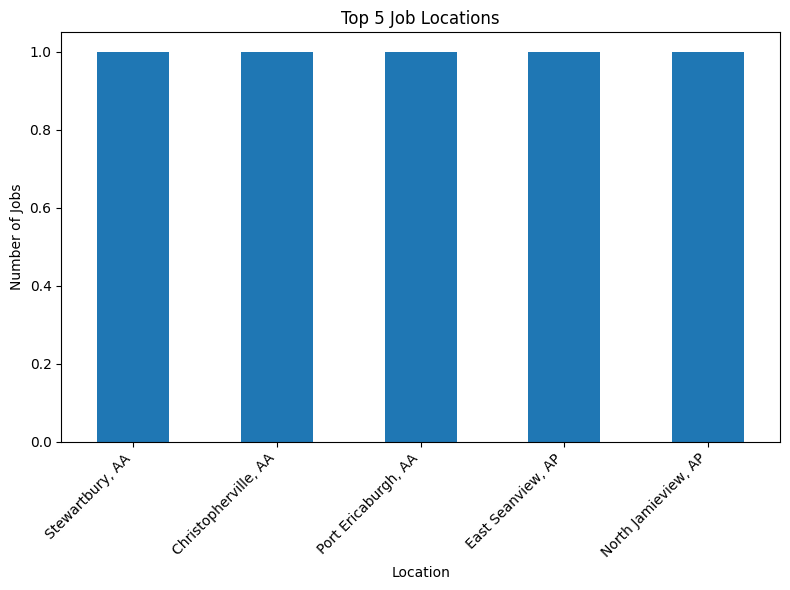

In [34]:
plt.figure(figsize=(8, 6))
location_counts.plot(kind='bar')
plt.title('Top 5 Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()